# 이페이지는 seaborn  tutorial 필사했음을 전달합니다.

In [1]:
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

# Options for visualizing long-form data

- 긴형식의 데이터에는 정확한 정의가 있지만 seaborn은 실제로 메모리의 데이터 구조 전체에서 구성되는 방식 측면에서 상당히 유연합니다. 문서의 나머지 부분에 있는 예제서는 pandas.DataFrame 플롯의 변수에 해당 열의 이름을 할당하여 오브젝트 및 참조 변수를 사용합니다.
- 그러나 python 사전 또는 해당 인터페이스를 구현하는 클래스 백터를 저장하는 것도 가능합니다. 

In [7]:
flights = sns.load_dataset("flights")
flights_dict = flights.to_dict()
flights_dict

{'year': {0: 1949,
  1: 1949,
  2: 1949,
  3: 1949,
  4: 1949,
  5: 1949,
  6: 1949,
  7: 1949,
  8: 1949,
  9: 1949,
  10: 1949,
  11: 1949,
  12: 1950,
  13: 1950,
  14: 1950,
  15: 1950,
  16: 1950,
  17: 1950,
  18: 1950,
  19: 1950,
  20: 1950,
  21: 1950,
  22: 1950,
  23: 1950,
  24: 1951,
  25: 1951,
  26: 1951,
  27: 1951,
  28: 1951,
  29: 1951,
  30: 1951,
  31: 1951,
  32: 1951,
  33: 1951,
  34: 1951,
  35: 1951,
  36: 1952,
  37: 1952,
  38: 1952,
  39: 1952,
  40: 1952,
  41: 1952,
  42: 1952,
  43: 1952,
  44: 1952,
  45: 1952,
  46: 1952,
  47: 1952,
  48: 1953,
  49: 1953,
  50: 1953,
  51: 1953,
  52: 1953,
  53: 1953,
  54: 1953,
  55: 1953,
  56: 1953,
  57: 1953,
  58: 1953,
  59: 1953,
  60: 1954,
  61: 1954,
  62: 1954,
  63: 1954,
  64: 1954,
  65: 1954,
  66: 1954,
  67: 1954,
  68: 1954,
  69: 1954,
  70: 1954,
  71: 1954,
  72: 1955,
  73: 1955,
  74: 1955,
  75: 1955,
  76: 1955,
  77: 1955,
  78: 1955,
  79: 1955,
  80: 1955,
  81: 1955,
  82: 1955,
  83: 

In [13]:
%matplotlib inline

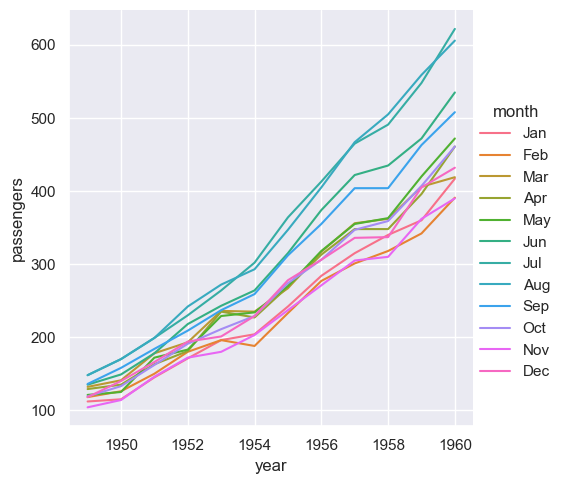

In [14]:
sns.relplot(data=flights_dict ,x='year',y='passengers',hue='month',kind='line')

- group by의 split-applt-combine 작업과 같은 많은 판다스 작업은 정보가 데이터 프레임의 열에서 출력 인덱스로 이동한 데이터 프레임을 생성합니다.
- 이름이 유지되는 한 여전히 정상적으로 데이터를 참조할 수 있습니다.

In [16]:
flights_avg = flights.groupby("year").mean()
flights_avg 

/var/folders/v_/3qkt68cd4xg0dz3cm9j8tlhw0000gn/T/ipykernel_73809/693569430.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  flights_avg = flights.groupby("year").mean()


,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000
1954,238.916667
1955,284.000000
1956,328.250000
1957,368.416667


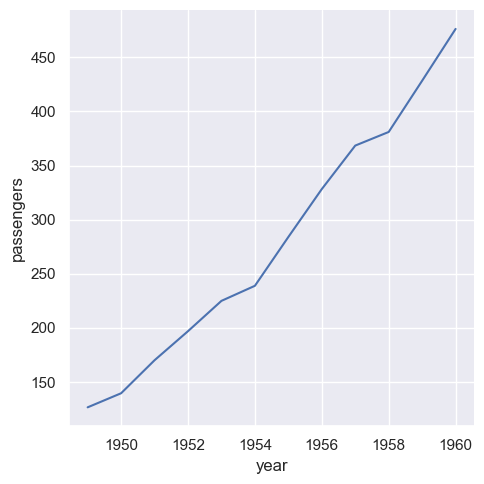

In [19]:
sns.relplot(data=flights_avg ,x='year',y='passengers',kind='line')

- x또한 데이터 벡터를 , 및 기타 플로팅 변수 에 대한 인수로 직접 전달할 수 있습니다. y 이러한 벡터가 판다스 개체인 경우 name 속성은 플롯에 레이블을 지정하는데 사용합니다.

In [25]:
year = flights_avg.index
year 

Int64Index([1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
            1960],
           dtype='int64', name='year')

In [26]:
passengers = flights_avg['passengers']
passengers

year
1949    126.666667
1950    139.666667
1951    170.166667
1952    197.000000
1953    225.000000
1954    238.916667
1955    284.000000
1956    328.250000
1957    368.416667
1958    381.000000
1959    428.333333
1960    476.166667
Name: passengers, dtype: float64

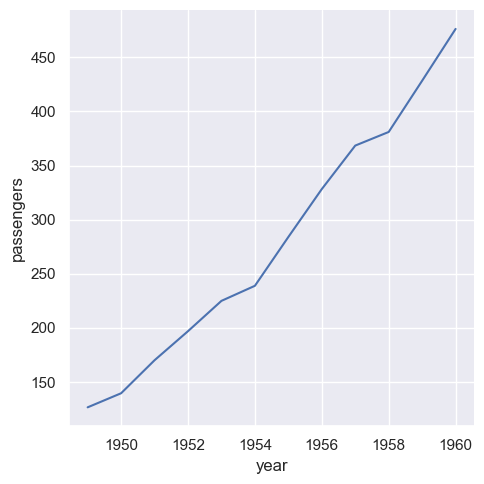

In [28]:
sns.relplot(x=year,y=passengers,kind='line')

- Python 시퀀스 인터페이스를 구현하는 Numpy 배열 및 기타 개체도 작동하지만 이름이 없으면 추가 조정 없이 플롯이 유익하지 않습니다.



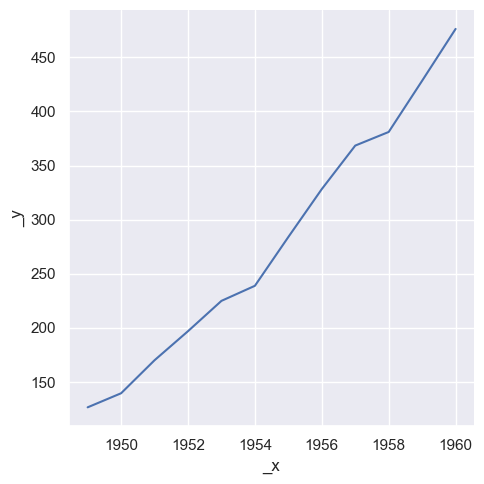

In [30]:
sns.relplot(x=year.to_numpy(),y=passengers.to_list(),kind='line')

# Options for visualizing wide-form data

- 넓은 형식의 데이터를 전달하는 옵션은 훨씬 더 유연합니다. 긴형식의 데이터와 마찬가지로 이름(경우에 따라 색인 ) 정보를 사용할 수 있기 때문에 판다스 개체가 선호됩니다. 그러나 본질적으로 단일 백터 또는 백터 모음으로 볼 수 있는 모든 형식을 에 전달할 수 있으며 data 일반적으로 유효한 플롯을 구성할 수 있습니다.
- 위에서 본 예에서는 직사각형을 사용했는데 pandas.DataFrame,이는 해당 열의 모음으로 생각 할 수 있습니다. 판다스 개체의 사전 또는 목록도 작동하지만 축 레이블의 손실됩니다.

In [36]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


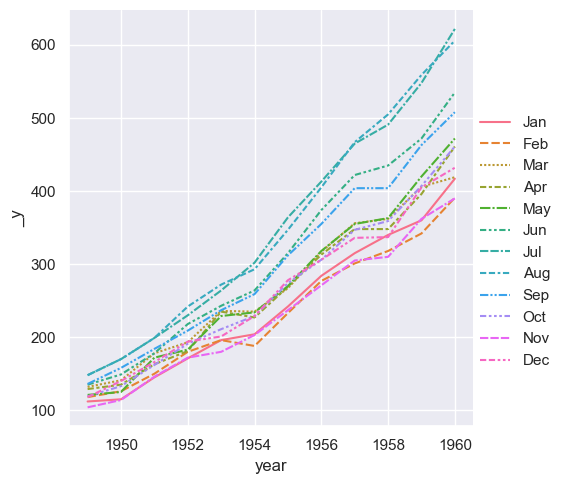

In [37]:
flights_wide_list = [col for _, col in flights_wide.items()]
sns.relplot(data=flights_wide_list, kind="line")

- 컬렉션의 벡터는 길이가 같을 필요가 없습니다. 가 있으면 index정렬하는 데 사용됩니다.

In [41]:
two_series = [flights_wide.loc[:1955, "Jan"],flights_wide.loc[1952:, "Aug"]]
two_series

[year
 1949    112
 1950    115
 1951    145
 1952    171
 1953    196
 1954    204
 1955    242
 Name: Jan, dtype: int64,
 year
 1952    242
 1953    272
 1954    293
 1955    347
 1956    405
 1957    467
 1958    505
 1959    559
 1960    606
 Name: Aug, dtype: int64]

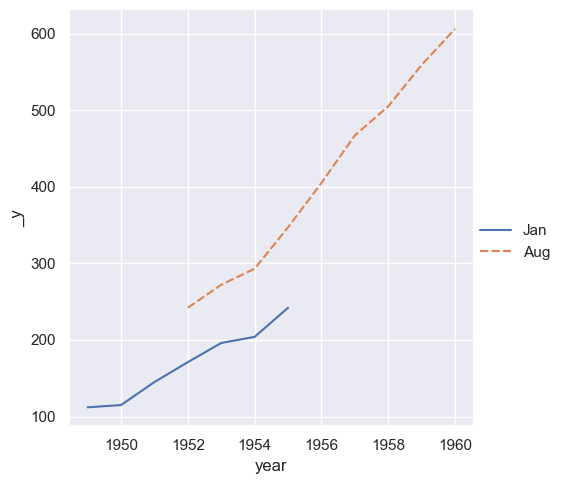

In [42]:
sns.relplot(data=two_series, kind="line")

- 그러나 이러한 벡터의 사전은 최소한 키를 사용합니다.

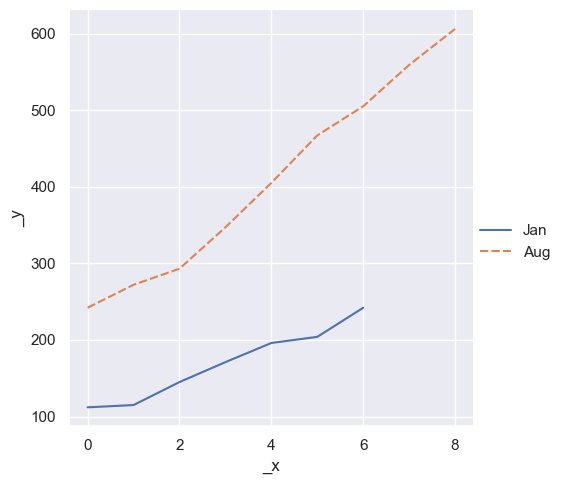

In [43]:
two_arrays_dict = {s.name: s.to_numpy() for s in two_series}
sns.relplot(data=two_arrays_dict, kind="line")

- 직사각형 numpy 배열은 인덱스 정보가 없는 데이터 프레임처럼 취급되므로 열 벡터의 모음으로 간주됩니다. 이것은 단일 인덱서가 행에 액세스하는 numpy 인덱싱 작업의 작동 방식과 다릅니다. 그러나 pandas가 배열을 데이터 프레임으로 변환하는 방법 또는 matplotlib가 배열을 그리는 방법과 일치합니다.

In [45]:
flights_array = flights_wide.to_numpy()
flights_array

array([[112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118],
       [115, 126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140],
       [145, 150, 178, 163, 172, 178, 199, 199, 184, 162, 146, 166],
       [171, 180, 193, 181, 183, 218, 230, 242, 209, 191, 172, 194],
       [196, 196, 236, 235, 229, 243, 264, 272, 237, 211, 180, 201],
       [204, 188, 235, 227, 234, 264, 302, 293, 259, 229, 203, 229],
       [242, 233, 267, 269, 270, 315, 364, 347, 312, 274, 237, 278],
       [284, 277, 317, 313, 318, 374, 413, 405, 355, 306, 271, 306],
       [315, 301, 356, 348, 355, 422, 465, 467, 404, 347, 305, 336],
       [340, 318, 362, 348, 363, 435, 491, 505, 404, 359, 310, 337],
       [360, 342, 406, 396, 420, 472, 548, 559, 463, 407, 362, 405],
       [417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390, 432]])

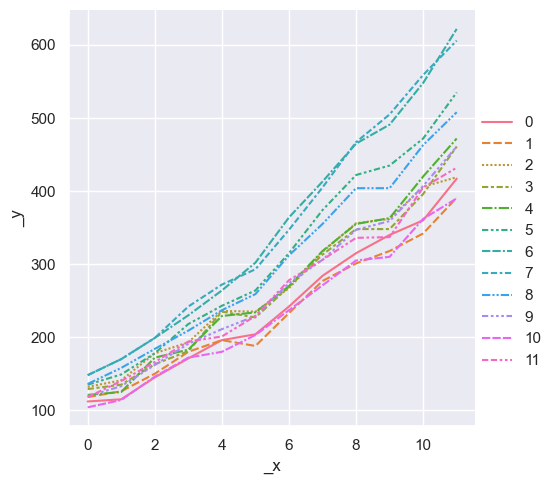

In [46]:
sns.relplot(data=flights_array, kind="line")